<a href="https://colab.research.google.com/github/sbthycode/Reinforcement_Learning/blob/main/Q_learning_taxi_simulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Implemeted Q-learning for the Taxi-v3 environment**

I have trained an agent that essentially performs the task of a taxi. The problem description can be found on the official github ripository or the problem_description file attached here.


In [151]:
import gym
import numpy as np 
# 1. Load Environment and Q-table structure
env = gym.make('Taxi-v3')


In [152]:
Q = np.zeros([env.observation_space.n,env.action_space.n])#500X6 dimentioned
Q.size

3000

In [153]:
env.observation_space.n#the observation space

500

In [154]:
env.action_space.n#the action space

6

In [171]:
# 2. Parameters of Q-learning
eta = .628 #parameter eta used while updating Q-Value
gma = .9 #parameter gamma(or the discount factor) used while updating Q-Value
epis = 2000 #the number of episodes
rev_list = []

In [172]:
env.reset()#genertes the taxi at a random position returning the state of that random position

272

In [173]:
np.random.randn(1,env.action_space.n).shape
# used to add randomization to the selection of next action(in the code below) to promote exploration of environment by agent


(1, 6)

Streaming output truncated to the last 5000 lines.
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Pickup)
+---------+
|R: | : :G|
|_: | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
+---------+
|R: | : :G|
| : | : : |
|_: : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
|_| : | : |
|Y| : |B: |
+---------+
  (South)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)
+---------+
|R: |

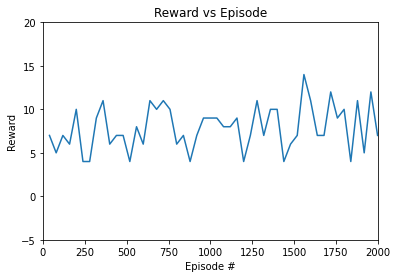

In [174]:
import matplotlib.pyplot as graph
myGraph = graph.figure()
xval, yval = [], []
mySubPlot = myGraph.add_subplot()
graph.xlabel("Episode #")
graph.ylabel("Reward")
graph.title("Reward vs Episode")
plotLine, = mySubPlot.plot(xval, yval)
mySubPlot.set_xlim([0, epis])
mySubPlot.set_ylim([-5,20])

def plotEpisode(myGraph, xval, yval, rAll, plotLine, i):
    xval.append(i)
    yval.append(rAll)
    plotLine.set_xdata(xval)
    plotLine.set_ydata(yval)
    myGraph.savefig("./plot")
#utility function to plot the graph of Reward vs episode number.

for i in range(epis):
    # Reset environment
    s = env.reset()
    rAll = 0 # total reward for an episode
    d = False
    j = 0
    #The Q-Table learning algorithm
    while j < 99:
        
        j+=1
        # Choose action from Q table 
        # argmax returns the index of the maximum number in the array
        #randn from -1 to 1. 
        # some randomization added to implement the concept of exploration/exploitation 
        # a is an integer that ranges from 0 to 5
        # divide by i as we want less randomness as the agent gets better. Thus less of exploration and more of exploitation of the learned knowledge. 
        a = np.argmax(Q[s,:] + np.random.randn(1,env.action_space.n)*(1/(i+1))) 
        
        #Get new state & reward from environment after performing action
        s1,r,d,_ = env.step(a)
       
        #Update Q-Table with new knowledge
        best_next=np.argmax(Q[s1,:])
        td_target=(r)+gma*(Q[s1,best_next])
        td_delta=td_target-Q[s,a]
        Q[s,a]+=eta*td_delta

        #Update total reward and state
        rAll += r
        s=s1
        env.render()
        if d == True:
            break
        
    rev_list.append(rAll)
    if((i+1)%40==0):
      plotEpisode(myGraph, xval, yval, rAll, plotLine, i)
    env.render()

print("Reward Sum on all episodes " + str(sum(rev_list)/epis))
print("Final Values Q-Table")
print(Q)

In [177]:
#test run of the environment
s=env.reset()
for i in range(15):
  a = np.argmax(Q[s,:])
  s1,r,d,_ = env.step(a)
  s = s1
  env.render()

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Pickup)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
|_| : | : |
|Y| : |B: |
+---------+
  (North)
+---------+
|R: | : :G|
| : | : : |
|_: : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)
+---------+
|R: | : :G|
|_: | : : |
| : : : : |
| | : | : |
|Y

**Resources Referred**
 Q-learning resources
1. https://towardsdatascience.com/reinforcement-learning-with-openai-d445c2c687d2
2. https://towardsdatascience.com/simple-reinforcement-learning-q-learning-fcddc4b6fe56#:~:text=The%20first%20is%20to%20use,us%20to%20make%20a%20decision.
3. https://github.com/openai/gym/blob/master/gym/envs/toy_text/taxi.py
